<h1><center> Linear regression model</center></h1>

In [1]:
### IMPORTS ###

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

<h2> A bit of theory </h2>

<h3> The model </h3>

Given some observations $\left( x_{i} \right)_{i \in [\![ 1, n ]\!]}$ and some output variables $\left( Y_{i} \right)_{i \in [\![ 1, n ]\!]}$, we consider in a first part the fixed-design one-dimensional ($\left( x_{i} \right) \subset \mathbb{R}^{p}$ with $p = 1$) linear regression model : $$Y_{i} = \beta_{0} + \beta_{1} x_{i} + \epsilon_{i} \,\, s.t. \,\, \forall i \in [\![ 1, n ]\!], \epsilon_{i} \overset{i.i.d.}{\sim} \mathcal{N} \left( 0, \sigma \right)$$

It is a simple case but is facilitates intuitive understanding and enables easy two-dimensional visualization. 

Later, we regard a higher-dimensional case, i.e. the general linear regression model (with obvious notation): $$Y_{i} = \beta_{0} + \beta_{1}x_{i, 1} + ... + \beta_{p}x_{i, p} + \epsilon_{i} \,\, s.t. \,\, \forall i \in [\![ 1, n ]\!], \epsilon_{i} \overset{i.i.d.}{\sim} \mathcal{N} \left( 0, \sigma \right)$$

<h3> The one-dimensional case </h3> 

In the one-dimensional case, $ML$ estimators for $\widehat{\beta}_{0}$ and $\widehat{\beta}_{1}$ are given by: 

$$\widehat{\beta}_{0} = \overline{Y} - \widehat{\beta}_{1} \overline{x} 
\,\,\,\, and \,\,\,\, 
\widehat{\beta}_{1} = \frac{\displaystyle\sum_{i = 1}^{n} \left(x_{i} - \overline{x} \right) \left( Y_{i} - \overline{Y} \right)}{\displaystyle\sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2}}$$


with their respective variances being: 

$$Var \left( \widehat{\beta}_{0} \right) = \widehat{\sigma}^{2} \left( \frac{1}{n} + \frac{\overline{x}^{2}}{\displaystyle\sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2}} \right) 
\,\,\,\, and \,\,\,\, 
Var \left( \widehat{\beta}_{1} \right) = \frac{\widehat{\sigma}^{2}}{\displaystyle\sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2}} $$


where $\widehat{\sigma}^{2}$ is the unbiased estimator for $\sigma^{2}$: 

$$\widehat{\sigma}^{2} = \frac{1}{n - 2} \sum_{i = 1}^{n} \left( Y_{i} - \left( \widehat{\beta}_{0} + \widehat{\beta}_{1} x_{i} \right) \right)^{2}$$


Besides, we know that 

$$\frac{ \left( \widehat{\beta}_{0} + \widehat{\beta}_{1}x \right) - \left( \beta_{0} + \beta_{1}x \right) }{ \widehat{\sigma} \sqrt{\frac{1}{n} + \frac{ \left( x - \overline{x} \right)^{2} }{ \sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2} }} } \sim t(n - 2)
\,\,\, and \,\,\, 
\frac{ Y - \left( \widehat{\beta}_{0} + \widehat{\beta}_{1}x \right) }{ \widehat{\sigma} \sqrt{1 + \frac{1}{n} + \frac{ \left( x - \overline{x} \right)^{2} }{ \sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2} }} } \sim t(n - 2) $$


This allows for construction of confidence and prediction intervals (at the level $\alpha$):

$$CI(x) = \widehat{\beta}_{0} + \widehat{\beta}_{1}x \, \pm \, t_{1 - \frac{\alpha}{2}}^{(n - 2)} \widehat{\sigma} \sqrt{ \frac{1}{n} + \frac{ \left( x - \overline{x} \right)^{2} }{ \sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2} }}$$

$$PI(x) = \widehat{\beta}_{0} + \widehat{\beta}_{1}x \, \pm \, t_{1 - \frac{\alpha}{2}}^{(n - 2)} \widehat{\sigma} \sqrt{ 1 + \frac{1}{n} + \frac{ \left( x - \overline{x} \right)^{2} }{ \sum_{i = 1}^{n} \left( x_{i} - \overline{x} \right)^{2} }}$$

<h3> The general case </h3>

In a higher dimensional case, we generalize those of the above mentioned material:

$$\widehat{\sigma}^{2} = \frac{1}{n - \left( p + 1 \right)} \sum_{i = 1}^{n} \left( Y_{i} - \left( \widehat{\beta}_{0} + \widehat{\beta}_{1} x_{i, 1} + \dots + \widehat{\beta}_{p} x_{i, p} \right) \right)^{2}$$

Further, one can show that for any $j \in [\![ 0, p ]\!]$, it holds

$$\frac{ \widehat{\beta}_{j} - \beta_{j} }{ \sqrt{Var \left( \widehat{\beta}_{j} \right)} } \sim t \left( n - \left( p + 1 \right) \right)$$

This allows to construct a Student-t test with the null hypothesis being $\mathcal{H}_{0} : \beta_{j} = 0$ in which one should reject $\mathcal{H}_{0}$ at the level $\alpha$ if:

$$\frac{ \widehat{\beta}_{j} }{ \sqrt{Var \left( \widehat{\beta}_{j} \right)} } \notin \left[ - t_{1 - \frac{\alpha}{2}}^{\left( n - \left( p + 1 \right) \right)}, t_{1 - \frac{\alpha}{2}}^{\left( n - \left( p + 1 \right) \right)} \right]$$

where $t_{1 - \frac{\alpha}{2}}^{\left( n - \left( p + 1 \right) \right)}$ is the quantile of the Student-t distribution with $\left( n - \left( p + 1 \right) \right)$ degrees of freedom at the level $1 - \frac{\alpha}{2}$. For a statistical test, the $p$-value is the probability that, under $\mathcal{H}_{0}$, the test statistic takes the value at least as extreme as its observed value.

Denote the design matrix $X = \left( x_{1}, \dots, x_{n} \right)^{T}$ with, for all $i \in [\![ 1, n ]\!]$, $x_{i} = \left( 1, x_{i, 1}, \dots, x_{i, p} \right)^{T}$ and let $C = \widehat{\sigma}^{2} \left( X^{T}X \right)^{-1}$. Then, one can show that

$$Var \left( \widehat{\beta}_{j} \right) = C_{jj}$$
$$CI(x_{\cdot}) = \widehat{\beta}_{0} + \widehat{\beta}_{1} x_{\cdot, 1} + \dots + \widehat{\beta}_{p} x_{\cdot, p} \, \pm \, t_{1 - \frac{\alpha}{2}}^{\left( n - \left( p + 1 \right) \right)} \sqrt{ \widehat{\sigma}^{2} x_{\cdot}^{T} \left( X^{T}X \right)^{-1} x_{\cdot} }$$
$$PI(x_{\cdot}) = \widehat{\beta}_{0} + \widehat{\beta}_{1} x_{\cdot, 1} + \dots + \widehat{\beta}_{p} x_{\cdot, p} \, \pm \, t_{1 - \frac{\alpha}{2}}^{\left( n - \left( p + 1 \right) \right)} \sqrt{ \widehat{\sigma}^{2} \left( 1 + x_{\cdot}^{T} \left( X^{T}X \right)^{-1} x_{\cdot} \right) }$$

<h2> Regression analysis of the investment data </h2>

Let import the data from the file <tt>invest.txt</tt> and print them in a readable form, e.g. a table containing first $5$ observations.

In [2]:
df = pd.read_csv('invest.txt', sep = " ")
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


Now, let plot the data with Gross National Product (GNP, column <tt>gnp</tt>) being the abscissa and Investment (column <tt>invest</tt>) being the ordinate.

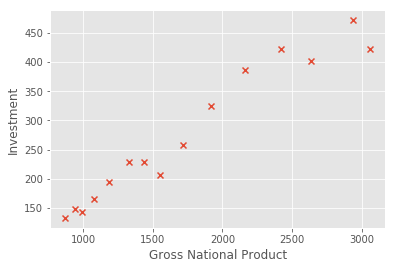

In [3]:
# Normal plot

abscissa = df['gnp']
ordinate = df['invest']

plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.scatter(abscissa, ordinate, marker = 'x')

<h3> NOTE </h3>

When working with monetary data, one often resorts to a logarithm transform to account for inequality of scale. Thus, let transform the two above mentioned columns, GNP and Investment, via logarithm; further we will be working with these columns log-transformed. Besides, all the calculations will be done with elementary arithmetic and not involving existing libraries for running linear regression. We will then compare the results with the ones obtained with libraries such as <tt>scikit-learn</tt>.

In [4]:
# Logarithm transformation, DO IT ONLY ONCE
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])

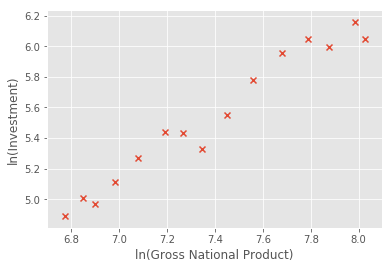

In [5]:
plt.xlabel('ln(Gross National Product)')
plt.ylabel('ln(Investment)')
plt.scatter(df['gnp'], df['invest'], marker = 'x')

For the linear regression of Investment on GNP, let estimate the intercept and the slope and their standard deviations, as well as the determination coefficient for the ordinary least squares.

In [6]:
# see the theoretical part above for the formulas

X = np.array(df['gnp'])
y = np.array(df['invest'])
n = X.size # number of samples
mean_X = np.mean(X)
mean_y = np.mean(y)

centered_X = X - mean_X
centered_y = y - mean_y

slope_estimator = sum(centered_X * centered_y) / sum(centered_X ** 2) # beta_1
intercept_estimator = mean_y - slope_estimator * mean_X # beta_0

beta = np.array([intercept_estimator, slope_estimator])
h = np.transpose(np.vstack((np.ones(X.shape), X))) @ beta
variance_estimator = (1/(n - 2)) * sum((y - h) ** 2)

std_intercept = np.sqrt(variance_estimator * ((1/n) + mean_X**2 / sum(centered_X ** 2)))
std_slope = np.sqrt(variance_estimator / sum(centered_X ** 2))

determination_coefficient = 1 - sum((y - h) ** 2) / sum(centered_y ** 2)

print('Estimation of' + '\n' +
      '- the intercept: ' + str(intercept_estimator) + '\n' +
      '- the slope: ' + str(slope_estimator) + '\n' +
      '- the standard deviation of the intercept: ' + str(std_intercept) + '\n' +
      '- the standard deviation of the slope: ' + str(std_slope) + '\n' +
      '- the determination coefficient: ' + str(determination_coefficient) + '\n'
     )

Estimation of
- the intercept: -1.9635913352301815
- the slope: 1.015281401598871
- the standard deviation of the intercept: 0.40954727166230853
- the standard deviation of the slope: 0.055383060354852874
- the determination coefficient: 0.9627572956057855



Now, we test the significance of the slope using the Student-$t$ test.

In [7]:
test_statistic = slope_estimator / std_slope
t_quantile = stats.t.ppf(0.95, n-2) 
p_value = 2 * (1 - stats.t.cdf(test_statistic, n-2))

print('Value of ' + '\n' +
      '- the test statistic: ' + str(test_statistic) + '\n' +
      '- the p-value: ' + str(p_value) + '\n\n' +
      'The value of the quantile is: ' + str(t_quantile) + ', whereas the test is : ' + str(test_statistic) + '.' + '\n' +
      'This means the test is in the critical region. Then, we can reject the hypothesis H0 (this is confirmed with the p-value).'
     )

Value of 
- the test statistic: 18.331984456866657
- the p-value: 1.1363709973011282e-10

The value of the quantile is: 1.7709333959867988, whereas the test is : 18.331984456866657.
This means the test is in the critical region. Then, we can reject the hypothesis H0 (this is confirmed with the p-value).


For the GNP value $1000$, we estimate the necessary Investment, provide confidence and prediction intervals for the $90\%$ level.

In [8]:
# see the theoretical part above for the formulas

v = np.log(1000)
predict = [1, v] @ beta

print('For the GNP value 1000, the predicted investment is: ' + str(np.exp(predict)) + '\n')

alpha = 0.1

confidence_interval = [np.exp(predict - stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * ((1/n) + (v - mean_X)**2/sum(centered_X**2)))),
                       np.exp(predict + stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * ((1/n) + (v - mean_X)**2/sum(centered_X**2))))]

print('The confidence interval at the 90% level for the predicted investment with GNP value 1000 is: [' + 
      str(confidence_interval[0]) + ', ' + str(confidence_interval[1]) + '] \n')

prediction_interval = [np.exp(predict - stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * (1 + (1/n) + (v - mean_X)**2/sum(centered_X**2)))),
                       np.exp(predict + stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * (1 + (1/n) + (v - mean_X)**2/sum(centered_X**2))))]

print('The prediction interval at the 90% level for the predicted investment with GNP value 1000 is: [' + 
      str(prediction_interval[0]) + ', ' + str(prediction_interval[1]) + ']')

For the GNP value 1000, the predicted investment is: 155.97942793105494

The confidence interval at the 90% level for the predicted investment with GNP value 1000 is: [146.67552673421952, 165.8734928682758] 

The prediction interval at the 90% level for the predicted investment with GNP value 1000 is: [132.00238933412936, 184.31167845087424]


On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), let plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.

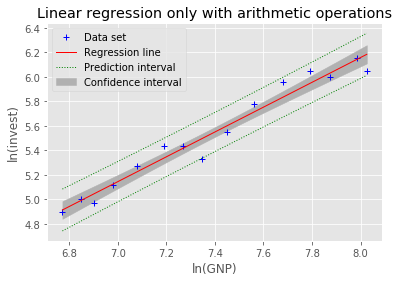

In [9]:
index = np.linspace(min(X), max(X), 100)
regression_line = slope_estimator * np.linspace(min(X), max(X), 100) + intercept_estimator

predict_i = np.transpose(np.vstack((np.ones(100), index))) @ beta

confidence_interval_down = predict_i - stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * ((1/n) + (index - mean_X)**2/sum(centered_X**2)))
confidence_interval_up = predict_i + stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * ((1/n) + (index - mean_X)**2/sum(centered_X**2)))
prediction_interval_down = predict_i - stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * (1 + (1/n) + (index - mean_X)**2/sum(centered_X**2)))
prediction_interval_up = predict_i + stats.t.ppf(1 - alpha/2, n-2) * np.sqrt(variance_estimator * (1 + (1/n) + (index - mean_X)**2/sum(centered_X**2)))

plt.xlabel('ln(GNP)')
plt.ylabel('ln(invest)')
plt.title('Linear regression only with arithmetic operations')

plt.plot(X, y, 'b+', label = 'Data set')
plt.plot(index, regression_line, c = 'r', label = 'Regression line', linewidth = 1)
plt.plot(index, prediction_interval_down, 'g:', label = 'Prediction interval', linewidth = 1)
plt.plot(index, prediction_interval_up, 'g:', linewidth = 1)
plt.fill_between(index, confidence_interval_down, confidence_interval_up,color='#B1B1B1', label = 'Confidence interval')

plt.legend(loc = 'best')
plt.show()

Now, let estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value $1000$ using <tt>scikit-learn</tt> library.

In [10]:
X_bis = X.reshape(-1, 1)
y_bis = y.reshape(-1, 1)

reg = LinearRegression().fit(X_bis, y_bis)

slope_estimator2 = reg.coef_[0, 0]
intercept_estimator2 = reg.intercept_ [0]
determination_coefficient2 = reg.score(X_bis, y_bis)

predict_1000 = np.exp(reg.predict(X = [[np.log(1000)]])[0, 0])

print('Estimation with sklearn of' + '\n\n' +
      '- the intercept: ' + str(intercept_estimator2) + '\n' +
      '- the slope: ' + str(slope_estimator2) + '\n' +
      '- the determination coefficient: ' + str(determination_coefficient2) + '\n' +
      'Prediction of Investment for the GNP value 1000: ' + str(predict_1000) + '\n\n'
     )

print('Before, we had: \n\n' +
      '- the intercept: ' + str(intercept_estimator) + '\n' +
      '- the slope: ' + str(slope_estimator) + '\n' +
      '- the determination coefficient: ' + str(determination_coefficient) + '\n' +
      'Prediction of Investment for the GNP value 100: ' + str(np.exp(predict)))

Estimation with sklearn of

- the intercept: -1.9635913352301815
- the slope: 1.015281401598871
- the determination coefficient: 0.9627572956057855
Prediction of Investment for the GNP value 1000: 155.97942793105494


Before, we had: 

- the intercept: -1.9635913352301815
- the slope: 1.015281401598871
- the determination coefficient: 0.9627572956057855
Prediction of Investment for the GNP value 100: 155.97942793105494


We see that we have the same results than those obtained by hands.

On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), we plot the data, the regression line and the predicted point (in a different color).

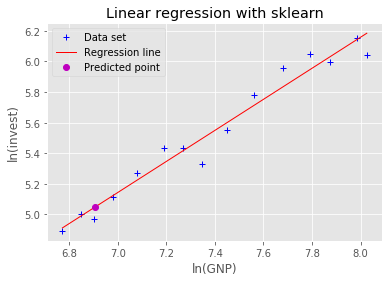

In [11]:
index2 = np.linspace(min(X), max(X), 100).reshape(-1, 1);
regression_line2 = np.hstack((np.ones(index2.shape), index2))@np.array([reg.intercept_[0], reg.coef_[0]])

plt.xlabel('ln(GNP)')
plt.ylabel('ln(invest)')
plt.title('Linear regression with sklearn')

plt.plot(X, y, 'b+', label = 'Data set')
plt.plot(index2, regression_line2, c = 'r', label = 'Regression line', linewidth = 1)
plt.plot([np.log(1000)], [np.log(predict_1000)], 'o', c = 'm', label = 'Predicted point')

plt.legend(loc = 'best')
plt.show()

We observe that this graphic coincides with the one we obtained before.

<h3> NOTE </h3> 

Further, we consider an additional explanatory variable, namely Interest (column “interest”, without a logarithmic transform). As before, all the calculations will be done with elementary arithmetic and will not involve existing libraries for running linear regression.

For the linear regression of Investment on GNP and Interest, let compute the associated Gram matrix and check if it is full rank.

In [12]:
design_matrix = np.hstack((np.ones(n).reshape(-1, 1), np.array(df[['gnp', 'interest']]).reshape(-1, 2)))

gram_matrix = (1/n) * np.transpose(design_matrix) @ design_matrix
gram_eigenvalues = np.linalg.eig(gram_matrix)[0]
gram_is_full_rank = not(gram_eigenvalues == 0).any()
print('Is the gram matrix full rank ? ' + 'Yes'*(gram_is_full_rank) + 'No'*(not(gram_is_full_rank)))

Is the gram matrix full rank ? Yes


For the linear regression of Investment on GNP and Interest, we estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, we test significance of each coefficient using the Student-$t$ test. Finally, we discuss the significance of the estimated regression coefficients.

In [13]:
inverse = np.linalg.inv(n * gram_matrix)
reg_parameters = inverse @ np.transpose(design_matrix) @ y
prediction = design_matrix @ reg_parameters

variance_estimator2 = (1/(n-3)) * sum((y - prediction) ** 2)
std2 = np.sqrt(variance_estimator2 * inverse.diagonal())
 
determination_coefficient3 = 1 - (np.linalg.norm(y - prediction)/np.linalg.norm(y - mean_y)) ** 2

reg_parameters_reduced = reg_parameters / std2
p_values = 2 * (1 - stats.t.cdf(np.abs(reg_parameters_reduced), n-3))

display(Markdown('In what follows, the first coefficient corresponds to $\\beta_{0}$ (intercept), the second to $\\beta_{1}$ and the third to $\\beta_{2}$.'))

print('The regression parameters are: ' + '(' + str(reg_parameters[0]) + ', ' + str(reg_parameters[1]) + ', ' + str(reg_parameters[2]) + ') \n')
print('Their respective standard deviations are: ' + '(' + str(std2[0]) + ', ' + str(std2[1]) + ', ' + str(std2[2]) + ') \n')
print('The p-values are: ' + '(' + str(p_values[0]) + ', ' + str(p_values[1]) + ', ' + str(p_values[2]) + ') \n')
print('The determination coefficient for the ordinary least squares is: ' + str(determination_coefficient3))

display(Markdown('The two first coefficients $\\beta_{0}$ and $\\beta_{1}$ are in the rejected region so the null hypothesis $H_{0}$ can be rejected. However, this is not the case with $\\beta_{2}$, then we cannot reject the null hypothesis.'))

In what follows, the first coefficient corresponds to $\beta_{0}$ (intercept), the second to $\beta_{1}$ and the third to $\beta_{2}$.

The regression parameters are: (-2.1804547259130356, 1.0512426913199522, -0.006528879406103791) 

Their respective standard deviations are: (0.6623991977963773, 0.10206137806192427, 0.015344205065604225) 

The p-values are: (0.0064383670509060575, 2.5995168484449493e-07, 0.6780071418822278) 

The determination coefficient for the ordinary least squares is: 0.9633108306726244


The two first coefficients $\beta_{0}$ and $\beta_{1}$ are in the rejected region so the null hypothesis $H_{0}$ can be rejected. However, this is not the case with $\beta_{2}$, then we cannot reject the null hypothesis.

For the values of $GNP = 1000$ and $Interest = 10$, let predict the $log(Investment)$ and provide confident and prediction intervals at the $99.9\%$ level.

In [14]:
v2 = np.array([1, np.log(1000), 10])
prediction_1000_10 = v2 @ reg_parameters

print('The predicted log(Investment) for GNP value 1000 and interest value 10 is: ' + str(prediction_1000_10) + '\n')

alpha2 = 0.001
confidence_interval2 = [prediction_1000_10 - stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * v2.T @ inverse @ v2),
                        prediction_1000_10 + stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * v2.T @ inverse @ v2)]

print('The confidence interval at the 99.9% level for the predicted log(investment) with GNP value 1000 and interest 10 is: [' + 
      str(confidence_interval2[0]) + ', ' + str(confidence_interval2[1]) + '] \n')

prediction_interval2 = [prediction_1000_10 - stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * (1 + v2.T @ inverse @ v2)),
                        prediction_1000_10 + stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * (1 + v2.T @ inverse @ v2))]

print('The prediction interval at the 99.9% level for the predicted log(investment) with GNP value 1000 and interest 10 is: [' + 
      str(prediction_interval2[0]) + ', ' + str(prediction_interval2[1]) + ']')

The predicted log(Investment) for GNP value 1000 and interest value 10 is: 5.015983730482715

The confidence interval at the 99.9% level for the predicted log(investment) with GNP value 1000 and interest 10 is: [4.640184036688111, 5.391783424277318] 

The prediction interval at the 99.9% level for the predicted log(investment) with GNP value 1000 and interest 10 is: [4.473803343640295, 5.558164117325134]


On a same $3D$-plot with axes being $log(GNP)$, $Interest$, and $log(Investment)$, we draw data points, their predictions, regression plane and surfaces of the $99.9\%$ confidence intervals for each pair of values
of $log(GNP)$ and $Interest$ between their minimum and maximum.

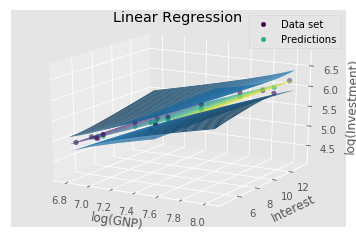

In [15]:
#to use interactive figure
#%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('Linear Regression')
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)')

ax.scatter3D(xs = design_matrix[:, 1], ys = design_matrix[:, 2], zs = y, c = '#440154FF', label = 'Data set')
ax.scatter3D(xs = design_matrix[:, 1], ys = design_matrix[:, 2], zs = prediction, c = '#29AF7FFF', label = 'Predictions')

mx, Mx = min(design_matrix[:, 1]), max(design_matrix[:, 1])
my, My = min(design_matrix[:, 2]), max(design_matrix[:, 2])

xx, yy = np.meshgrid(np.linspace(mx, Mx, 50), np.linspace(my, My, 50))
grid = np.hstack((np.ones(xx.size).reshape(-1, 1), xx.ravel().reshape(-1, 1) , yy.ravel().reshape(-1, 1)))

zz = reg_parameters[0] + xx * reg_parameters[1] + yy * reg_parameters[2]

confidence_interval_down2 = zz - stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * (grid @ inverse @ grid.T).diagonal().reshape(50, 50))
confidence_interval_up2 = zz + stats.t.ppf(1 - alpha2/2, n-3) * np.sqrt(variance_estimator2 * (grid @ inverse @ grid.T).diagonal().reshape(50, 50))

ax.plot_surface(X = xx, Y = yy, Z = zz, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.plot_surface(X = xx, Y = yy, Z = confidence_interval_down2, color = '#1f77b4')
ax.plot_surface(X = xx, Y = yy, Z = confidence_interval_up2, color = '#1f77b4')

ax.view_init(20, 300)
ax.legend()

Finally, we estimate the regression and determination coefficients and predict the necessary $log(Investment)$ for $GNP = 1000$ and $Interest = 10$ using <tt>scikit-learn</tt> library.

In [16]:
reg2 = LinearRegression().fit(design_matrix, y_bis)
prediction_1000_10_bis = reg2.predict(X = np.array([1, np.log(1000), 10]).reshape(-1, 3))[0, 0]
#slope_estimator2 = reg.coef_[0, 0]
#intercept_estimator2 = reg.intercept_ [0]
#determination_coefficient2 = reg.score(X_bis, y_bis)

#predict_1000 = np.exp(reg.predict(X = np.log(1000))[0, 0])

print('Linear Regression with sklearn: \n')
print('Parameters: ' + str(reg2.intercept_[0]) + ', ' + str(reg2.coef_[0, 1]) + ', ' + str(reg2.coef_[0, 2]))
print('Determination coefficient for the OLS: ' + str(reg2.score(design_matrix, y_bis)))
print('Predicted log(Investment) for GNP = 1000, interest = 10: ' + str(prediction_1000_10_bis) + '\n\n')

print('Before (without sklearn), we had: \n')
print('Parameters: ' + str(reg_parameters[0]) + ', ' + str(reg_parameters[1]) + ', ' + str(reg_parameters[2]))
print('Determination coefficient for the OLS: ' + str(determination_coefficient3))
print('Predicted log(Investment) for GNP = 1000, interest = 10: ' + str(prediction_1000_10) + '\n')

Linear Regression with sklearn: 

Parameters: -2.180454725911404, 1.0512426913196597, -0.006528879406067978
Determination coefficient for the OLS: 0.9633108306726245
Predicted log(Investment) for GNP = 1000, interest = 10: 5.015983730482684


Before (without sklearn), we had: 

Parameters: -2.1804547259130356, 1.0512426913199522, -0.006528879406103791
Determination coefficient for the OLS: 0.9633108306726244
Predicted log(Investment) for GNP = 1000, interest = 10: 5.015983730482715



We observe that the estimated values coincide with the ones obtained using existing implementation.